In [1]:
# IMPORTING LOCAL MODULES
import importlib
import form_pred
import ball_movement
import get_data
import def_clean
import TrainTestNFL

# REFRESHING LOCAL CHANGES
importlib.reload(get_data)
importlib.reload(form_pred)
importlib.reload(def_clean)
importlib.reload(ball_movement)
importlib.reload(TrainTestNFL)

# IMPORTING LOCAL PACKAGES
from get_data import get_assets, get_positional_data
from form_pred import clean_positional
from ball_movement import ball_quadrants, make_quad_chart
from def_clean import DefensiveCleaning
from TrainTestNFL import TrainTestNFL

# IMPORTS
import pandas as pd
import numpy as np

In [2]:
from pipeline import FullPipeWrapper

pipe_wrap = FullPipeWrapper()

positional data already downloaded.
reading positional data.
returning positional data.


In [3]:
from sklearn.linear_model import LogisticRegression

pipe_off_logit_coords = pipe_wrap.build_pipe(side="off", model=LogisticRegression())

In [4]:
from sklearn.model_selection import GridSearchCV

perm_feats = ['possessionTeam','down','offenseFormation']
situational = ['score_differential', 'timeRemaining','yardline_first_dir','yardline_100_dir']
reduction = ['perc_left','perc_right','perc_behind_los']
pos = ['FB','HB','QB','RB','TE','WR']
coords = ['FBL0_x','FBR0_x','HBL0_x','HBL1_x','HBR0_x','HBR1_x','QB0_x','QB1_x','RBL0_x','RBL1_x','RBL2_x','RBR0_x','RBR1_x','RBR2_x','TEL0_x','TEL1_x','TEL2_x','TER0_x','TER1_x','TER2_x','WRL0_x','WRL1_x','WRL2_x','WRL3_x','WRR0_x','WRR1_x','WRR2_x','WRR3_x','FBL0_y','FBR0_y','HBL0_y','HBL1_y','HBR0_y','HBR1_y','QB0_y','QB1_y','RBL0_y','RBL1_y','RBL2_y','RBR0_y','RBR1_y','RBR2_y','TEL0_y','TEL1_y','TEL2_y','TER0_y','TER1_y','TER2_y','WRL0_y','WRL1_y','WRL2_y','WRL3_y','WRR0_y','WRR1_y','WRR2_y','WRR3_y','FBL0_in','FBR0_in','HBL0_in','HBL1_in','HBR0_in','HBR1_in','QB0_in','QB1_in','RBL0_in','RBL1_in','RBL2_in','RBR0_in','RBR1_in','RBR2_in','TEL0_in','TEL1_in','TEL2_in','TER0_in','TER1_in','TER2_in','WRL0_in','WRL1_in','WRL2_in','WRL3_in','WRR0_in','WRR1_in','WRR2_in','WRR3_in']

params = {'model__penalty': ['l1', 'l2', 'elasticnet', 'none'],
          'model__solver': ['newton-cg', 'sag', 'saga','lbfgs'],
          'model__C': [0.001, .01,.1, 1, 10],
          'model__class_weight' : ['balanced', 'none'],
          'off_full_pipe__full_cols__select_cols__columns' : [
              perm_feats + situational,
              perm_feats + reduction, 
              perm_feats + pos,
              perm_feats + coords,
              perm_feats + situational + coords,
              perm_feats + reduction + pos + coords + situational,
              perm_feats + situational + reduction,
          ]}

grid_logit_paramX = GridSearchCV(pipe_off_logit_coords, params, scoring = 'f1_macro')
grid_logit_paramY = GridSearchCV(pipe_off_logit_coords, params, scoring = 'f1_macro')

In [5]:
grid_logit_paramX.fit(pipe_wrap.X_train, pipe_wrap.y_train_x)

GridSearchCV(estimator=Pipeline(steps=[('off_full_pipe',
                                        Pipeline(steps=[('full_cols',
                                                         Pipeline(steps=[('off_pre_one',
                                                                          ColumnTransformer(transformers=[('info_scale',
                                                                                                           StandardScaler(),
                                                                                                           Index(['perc_left', 'perc_right', 'perc_behind_los', 'FB', 'HB', 'QB', 'RB',
       'TE', 'WR', 'score_differential', 'timeRemaining', 'yardline_first_dir',
       'yardline_100_dir'],
      dtype='object...
                                                                             'FBL0_x',
                                                                             'FBR0_x',
                                                 

In [ ]:
grid_logit_paramY.fit(pipe_wrap.X_train, pipe_wrap.y_train_y)

KeyboardInterrupt: 

In [11]:
grid_logit_paramX.best_params_

{'model__C': 1,
 'model__class_weight': 'balanced',
 'model__penalty': 'l2',
 'model__solver': 'newton-cg',
 'off_full_pipe__full_cols__select_cols__columns': ['possessionTeam',
  'down',
  'offenseFormation',
  'score_differential',
  'timeRemaining',
  'yardline_first_dir',
  'yardline_100_dir',
  'FBL0_x',
  'FBR0_x',
  'HBL0_x',
  'HBL1_x',
  'HBR0_x',
  'HBR1_x',
  'QB0_x',
  'QB1_x',
  'RBL0_x',
  'RBL1_x',
  'RBL2_x',
  'RBR0_x',
  'RBR1_x',
  'RBR2_x',
  'TEL0_x',
  'TEL1_x',
  'TEL2_x',
  'TER0_x',
  'TER1_x',
  'TER2_x',
  'WRL0_x',
  'WRL1_x',
  'WRL2_x',
  'WRL3_x',
  'WRR0_x',
  'WRR1_x',
  'WRR2_x',
  'WRR3_x',
  'FBL0_y',
  'FBR0_y',
  'HBL0_y',
  'HBL1_y',
  'HBR0_y',
  'HBR1_y',
  'QB0_y',
  'QB1_y',
  'RBL0_y',
  'RBL1_y',
  'RBL2_y',
  'RBR0_y',
  'RBR1_y',
  'RBR2_y',
  'TEL0_y',
  'TEL1_y',
  'TEL2_y',
  'TER0_y',
  'TER1_y',
  'TER2_y',
  'WRL0_y',
  'WRL1_y',
  'WRL2_y',
  'WRL3_y',
  'WRR0_y',
  'WRR1_y',
  'WRR2_y',
  'WRR3_y',
  'FBL0_in',
  'FBR0_in',
  'HBL0

In [17]:
grid_logit_paramY.best_params_

{'model__C': 0.001,
 'model__class_weight': 'balanced',
 'model__penalty': 'none',
 'model__solver': 'newton-cg',
 'off_full_pipe__full_cols__select_cols__columns': ['possessionTeam',
  'down',
  'offenseFormation',
  'score_differential',
  'timeRemaining',
  'yardline_first_dir',
  'yardline_100_dir',
  'FBL0_x',
  'FBR0_x',
  'HBL0_x',
  'HBL1_x',
  'HBR0_x',
  'HBR1_x',
  'QB0_x',
  'QB1_x',
  'RBL0_x',
  'RBL1_x',
  'RBL2_x',
  'RBR0_x',
  'RBR1_x',
  'RBR2_x',
  'TEL0_x',
  'TEL1_x',
  'TEL2_x',
  'TER0_x',
  'TER1_x',
  'TER2_x',
  'WRL0_x',
  'WRL1_x',
  'WRL2_x',
  'WRL3_x',
  'WRR0_x',
  'WRR1_x',
  'WRR2_x',
  'WRR3_x',
  'FBL0_y',
  'FBR0_y',
  'HBL0_y',
  'HBL1_y',
  'HBR0_y',
  'HBR1_y',
  'QB0_y',
  'QB1_y',
  'RBL0_y',
  'RBL1_y',
  'RBL2_y',
  'RBR0_y',
  'RBR1_y',
  'RBR2_y',
  'TEL0_y',
  'TEL1_y',
  'TEL2_y',
  'TER0_y',
  'TER1_y',
  'TER2_y',
  'WRL0_y',
  'WRL1_y',
  'WRL2_y',
  'WRL3_y',
  'WRR0_y',
  'WRR1_y',
  'WRR2_y',
  'WRR3_y',
  'FBL0_in',
  'FBR0_in',
 

In [33]:
grid_logit_paramX.best_score_

0.3523107050043864

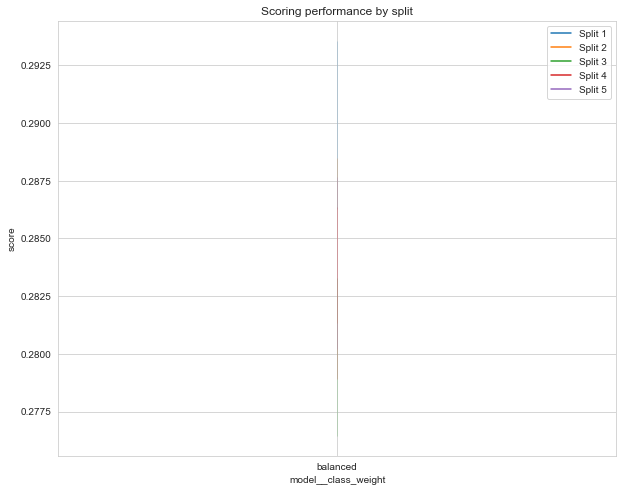

In [22]:
from grid_result_plot import create_result_plot

create_result_plot(grid_logit_paramY, "model__class_weight")

In [28]:
grid_logit_paramX

GridSearchCV(estimator=Pipeline(steps=[('off_full_pipe',
                                        Pipeline(steps=[('full_cols',
                                                         Pipeline(steps=[('off_pre_one',
                                                                          ColumnTransformer(transformers=[('info_scale',
                                                                                                           StandardScaler(),
                                                                                                           Index(['perc_left', 'perc_right', 'perc_behind_los', 'FB', 'HB', 'QB', 'RB',
       'TE', 'WR', 'score_differential', 'timeRemaining', 'yardline_first_dir',
       'yardline_100_dir'],
      dtype='object...
                                                                             'FBL0_x',
                                                                             'FBR0_x',
                                                 

In [31]:
import dill as pickle

with open("models/grid_logit_paramX.pkl", "wb") as logit_X:
    pickle.dump(grid_logit_paramX, logit_X)

In [32]:
import dill as pickle

with open("models/grid_logit_paramY.pkl", "wb") as logit_Y:
    pickle.dump(grid_logit_paramX, logit_Y)